<a href="https://colab.research.google.com/github/Zahrah-FA/heart-disease-dnn-dropout/blob/main/2318050_Zahrah_Heart_Disease_DNN_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. IMPORT LIBRARY**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

# **2. LOAD DATASET (RAW / KOTOR)**

In [3]:
# Load dataset mentah
df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DeepLearning/TugasAkhir/heart_disease_uci.csv')

# Lihat 5 data teratas
df_raw.head()

# Informasi dataset (cek tipe data & missing value)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# **3. EXPLORATORY DATA ANALYSIS**

In [4]:
# Cek missing value
print("Missing Value per Kolom:")
print(df_raw.isnull().sum())

# Distribusi target awal
print("Distribusi nilai kolom num:")
print(df_raw['num'].value_counts())

Missing Value per Kolom:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
Distribusi nilai kolom num:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


# **4. DATA CLEANING**

In [5]:
df_cleaned = df_raw.copy()

# Binary classification:
# 0 = tidak terkena penyakit jantung
# 1 = terkena penyakit jantung
df_cleaned['target'] = df_cleaned['num'].apply(lambda x: 0 if x == 0 else 1)
df_cleaned.drop('num', axis=1, inplace=True)

# Menghapus data duplikat
df_cleaned.drop_duplicates(inplace=True)

# Mengisi missing value numerik dengan median
for col in df_cleaned.select_dtypes(include=['int64','float64']).columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

print("Missing value setelah cleaning:")
print(df_cleaned.isnull().sum())

Missing value setelah cleaning:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
target        0
dtype: int64


/tmp/ipython-input-2839637749.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


# **5. ENCODING CATEGORICAL FEATURES**

In [6]:
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

df_cleaned.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


# **6. SCALE FEATURES**

In [7]:
X = df_cleaned.drop('target', axis=1)
y = df_cleaned['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ubah kembali ke DataFrame agar rapi
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# **7. SAVE & DOWNLOAD CLEANED DATA**

In [9]:
df_raw.to_csv('heart_disease_raw.csv', index=False)
df_final = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
df_final.to_csv('heart_disease_cleaned.csv', index=False)

from google.colab import files
files.download('heart_disease_raw.csv')
files.download('heart_disease_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **8. SPLIT DATA TRAIN & VALIDATION**

In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

# **9. MODEL TRAINING**

## **Model 1 DNN Tanpa Dropout (Baseline)**

In [11]:
model_no_dropout = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_no_dropout.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_no_dropout.summary()

history_no_dropout = model_no_dropout.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4015 - loss: 0.7489 - val_accuracy: 0.6630 - val_loss: 0.6259
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6635 - loss: 0.6251 - val_accuracy: 0.8207 - val_loss: 0.5328
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7471 - loss: 0.5473 - val_accuracy: 0.8478 - val_loss: 0.4761
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7771 - loss: 0.4909 - val_accuracy: 0.8478 - val_loss: 0.4362
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7898 - loss: 0.4442 - val_accuracy: 0.8424 - val_loss: 0.4166
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8209 - loss: 0.4096 - val_accuracy: 0.8315 - val_loss: 0.4106
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8203 - loss: 0.3996 - val_accuracy: 0.8315 - val_loss: 0.4069
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7963 - loss: 0.4297 - val_accuracy: 0.8315 - val_loss

## **Model 2 DNN Dengan Dropout**

In [12]:
model_dropout = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),      # Dropout layer
    Dense(16, activation='relu'),
    Dropout(0.2),      # Dropout layer
    Dense(1, activation='sigmoid')
])

model_dropout.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_dropout.summary()

history_dropout = model_dropout.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4722 - loss: 0.8001 - val_accuracy: 0.6576 - val_loss: 0.6382
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5883 - loss: 0.6560 - val_accuracy: 0.7446 - val_loss: 0.5671
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6958 - loss: 0.5757 - val_accuracy: 0.7935 - val_loss: 0.5213
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7388 - loss: 0.5495 - val_accuracy: 0.8152 - val_loss: 0.4880
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7791 - loss: 0.4981 - val_accuracy: 0.8424 - val_loss: 0.4657
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7887 - loss: 0.4954 - val_accuracy: 0.8370 - val_loss: 0.4474
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7783 - loss: 0.5086 - val_accuracy: 0.8587 - val_loss: 0.4385
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7766 - loss: 0.4901 - val_accuracy: 0.8641 - val_loss

# **10. VISUALISASI HASIL TRAINING**

## **Grafik Accuracy**

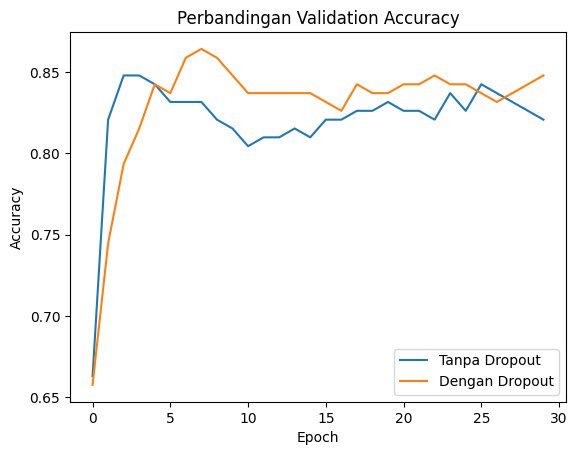

In [14]:
plt.figure()
plt.plot(history_no_dropout.history['val_accuracy'], label='Tanpa Dropout')
plt.plot(history_dropout.history['val_accuracy'], label='Dengan Dropout')
plt.title('Perbandingan Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Grafik Loss**

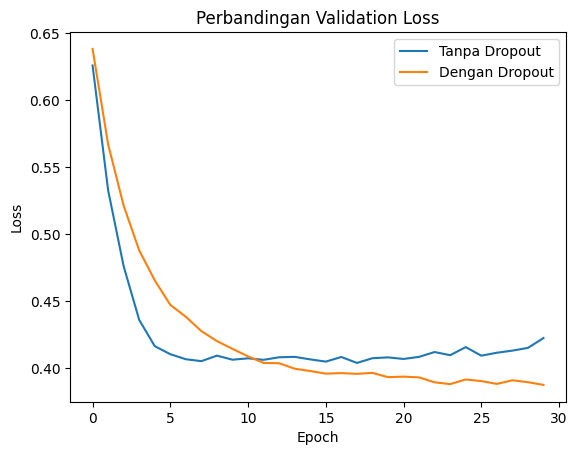

In [16]:
plt.figure()
plt.plot(history_no_dropout.history['val_loss'], label='Tanpa Dropout')
plt.plot(history_dropout.history['val_loss'], label='Dengan Dropout')
plt.title('Perbandingan Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()